In [34]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)

In [35]:
import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

In [36]:
df_train = red_wine.sample(frac=0.7,random_state=0)
df_valid = red_wine.drop(df_train.index)

In [37]:
x_train = df_train.drop('quality',axis=1)
x_valid = df_valid.drop('quality',axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024,activation='relu',input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',loss='mae')

In [40]:
history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=256,epochs=100,verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 5.5516 - val_loss: 4.4447
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 5.3420 - val_loss: 4.1427
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 5.1681 - val_loss: 9.6327
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 4.8694 - val_loss: 3.3170
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 4.5938 - val_loss: 10.1069
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 4.3005 - val_loss: 8.3359
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.9698 - val_loss: 2.5607
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 3.5721 - val_loss: 1.7448
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3.1361 - val_loss: 4.9601
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 2.7397 - val_loss: 3.6247
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.3626 - val_loss: 4.9553
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.9421 - val_

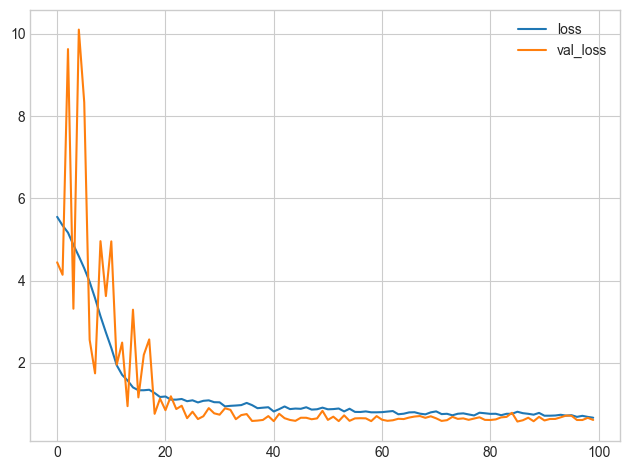

In [41]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();